# Machine Learning Project

# Introduction

In recent years, there has been a massive rise in the usage of dating apps to find partners. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

In this capstone project, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


## Import Python Modules

First we import the modules that will be used in this project:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

## Loading the Data

Now we load the csv into a DataFrame:

In [3]:
df = pd.read_csv("profiles.csv")

df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [4]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [5]:
df.shape

(59946, 31)

This dataset has 59946 rows and 31 columns.

The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…

## Explore and Explain Data

Now I take a look at some columns and build graphs from the data to get better understanding about our dataset.First of all, I want to know the distribution of ages, height and income of OKCupid's users.

In [6]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### Age Distribution

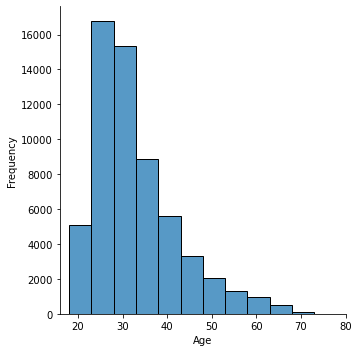

In [7]:
sns.displot(data=df, x="age", binwidth = 5);

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

We can see that most of the users are between 25 to 35 years old.We can also plot the age histogram by splitting the users by gender.

(16.0, 80.0)

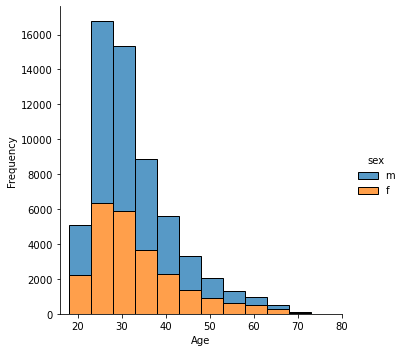

In [8]:
sns.displot(data=df, x="age", hue="sex", binwidth = 5, multiple = "stack");

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)

According to the histogram, the distribution for both genders are the same, but there are more male users than female users.

#### Height Distribution

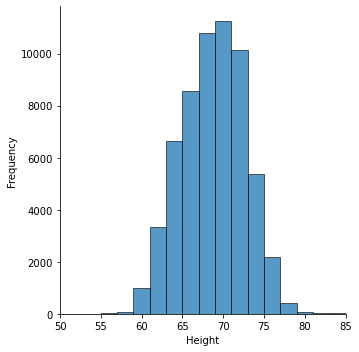

In [9]:
sns.displot(data=df, x="height", binwidth = 2);

plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 85)
plt.show()

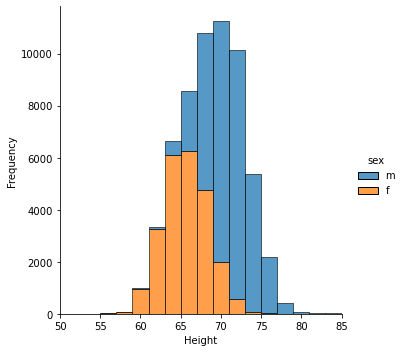

In [10]:
sns.displot(data=df, x="height", binwidth = 2, hue= 'sex', multiple= 'stack');

plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 85)
plt.show()

The heights of users has a normal distribution.Heights of most of the users are between 60 and 80.Males are taller than females.

#### Income Distribution

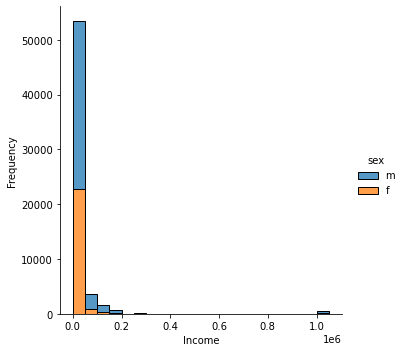

In [11]:
sns.displot(data=df, x="income",hue="sex", binwidth = 50000, multiple = "stack");

plt.xlabel("Income")
plt.ylabel("Frequency")
#plt.xlim(0, 200000)
plt.show()

Most of users have an income under 200000.Male users have higher income than females

### Categorical Variables

#### Gender

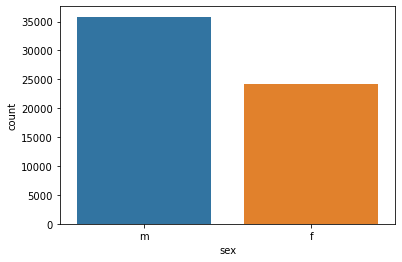

In [12]:
sns.countplot(data=df, x="sex");

Male users are more than female users.

#### Body Type

In [14]:
df.body_type.value_counts(dropna=False)

average           14652
fit               12711
athletic          11819
NaN                5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

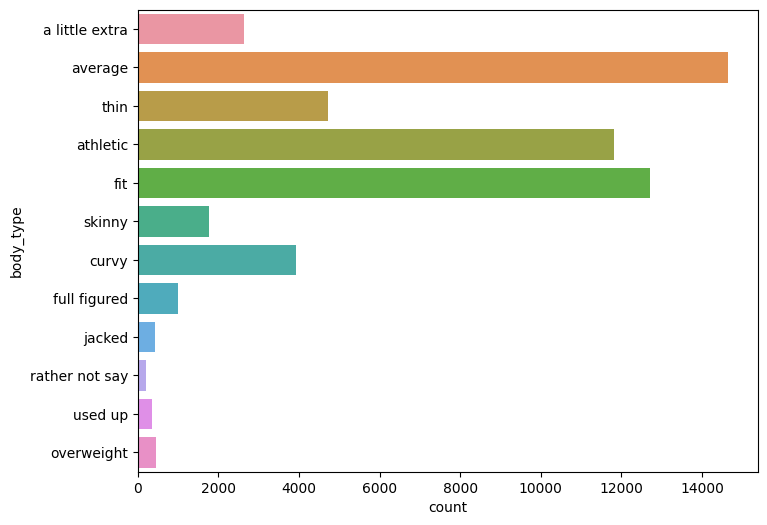

In [15]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="body_type");


Most of the users declared their body type as average, fit, or athletic.

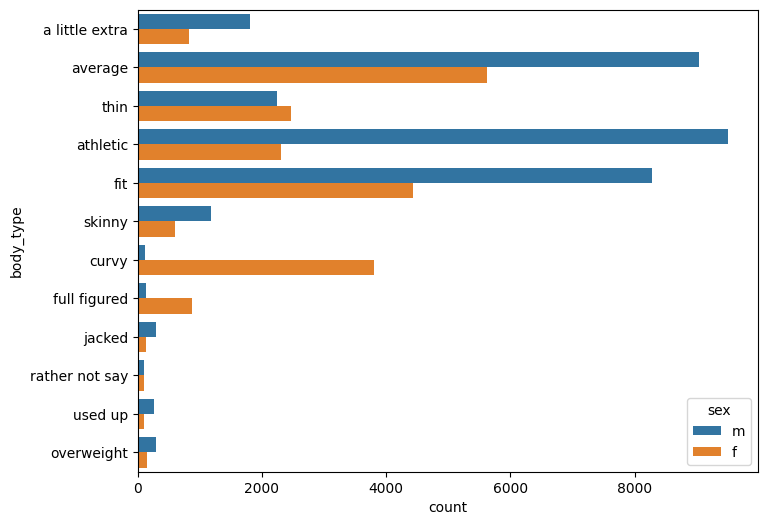

In [16]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="body_type", hue = 'sex');

When we split countplot of body type variable by gender, we can see that most of the females described their body types with following three categories: average, fit or curvy but males described their body types with athletic, average or fit.It seems that curvy and full figured are feminine descriptions and overweight and jacked used mostly by male users.

#### Diet

According to the countplot below, most of the users eat mostly anything, followed by 'anything', 'strongly anything'.The fourth popular diet is 'mostly vegeterian'.

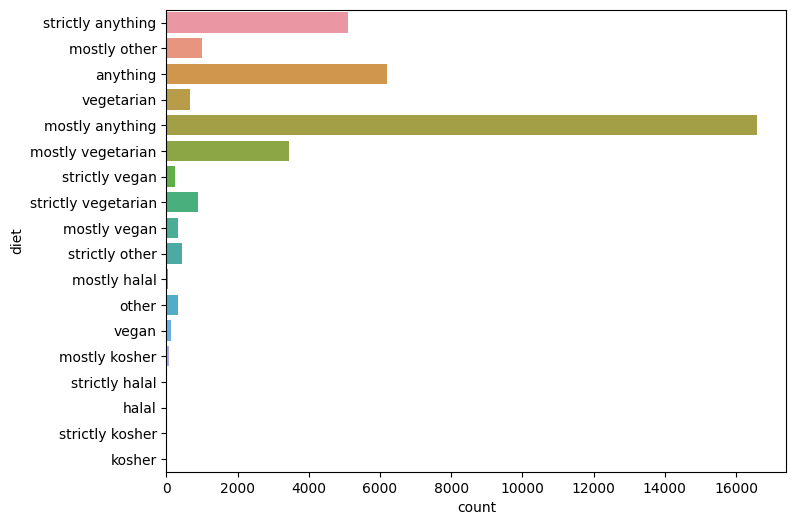

In [17]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="diet");

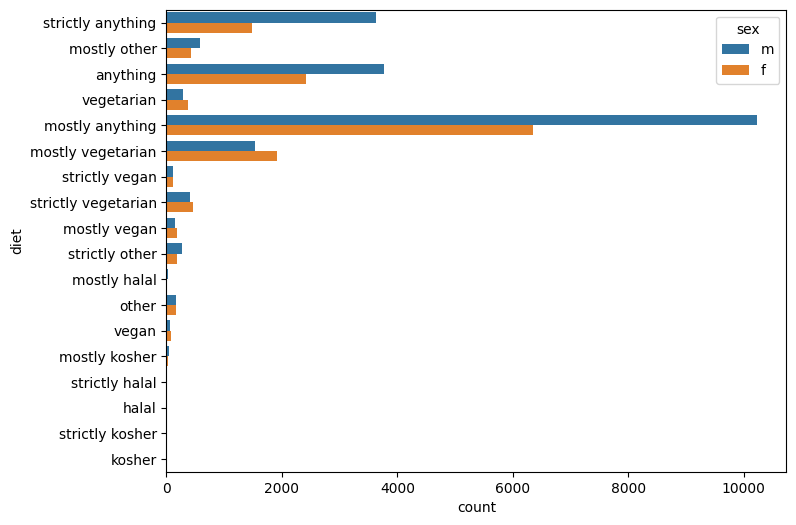

In [18]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="diet", hue = 'sex');

When we split the diet data with gender, women are more likely to be vegetarian.

#### Drinks

According to the plot, the majority of the users drink "socially".

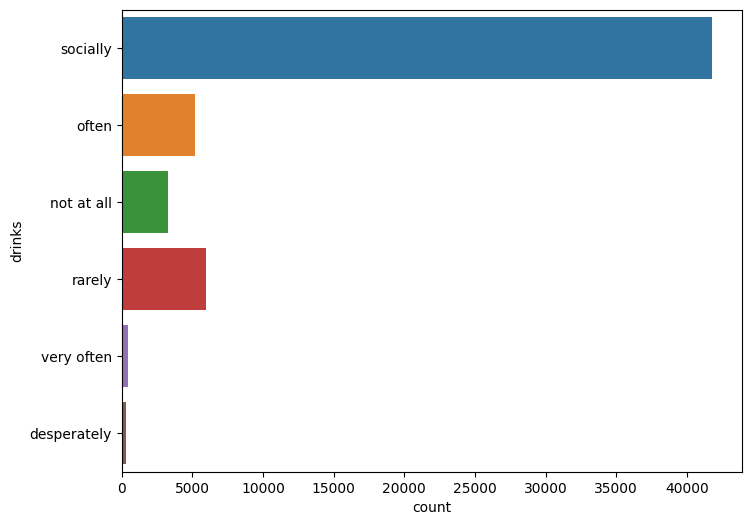

In [19]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="drinks");

#### Drugs

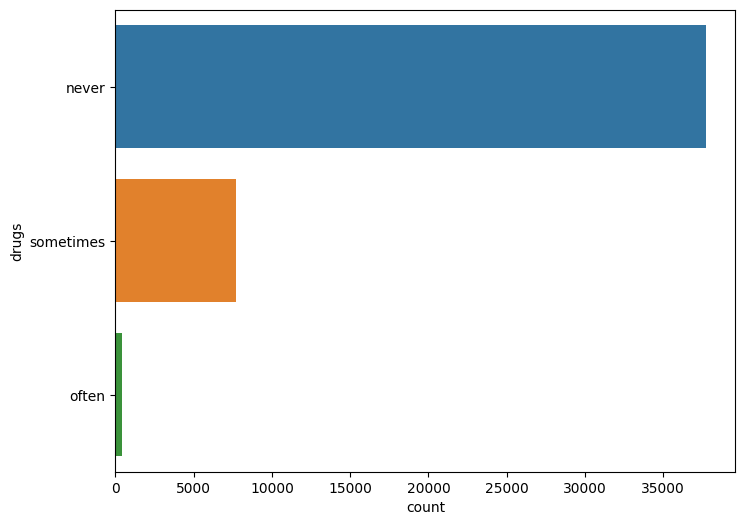

In [20]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="drugs");

we can see that overwhelming majority of the users never use drugs.

#### Education

According to the chart below, we can see that the majority of users graduated from college/university followed by masters graduates and people who 'working on college/university'.

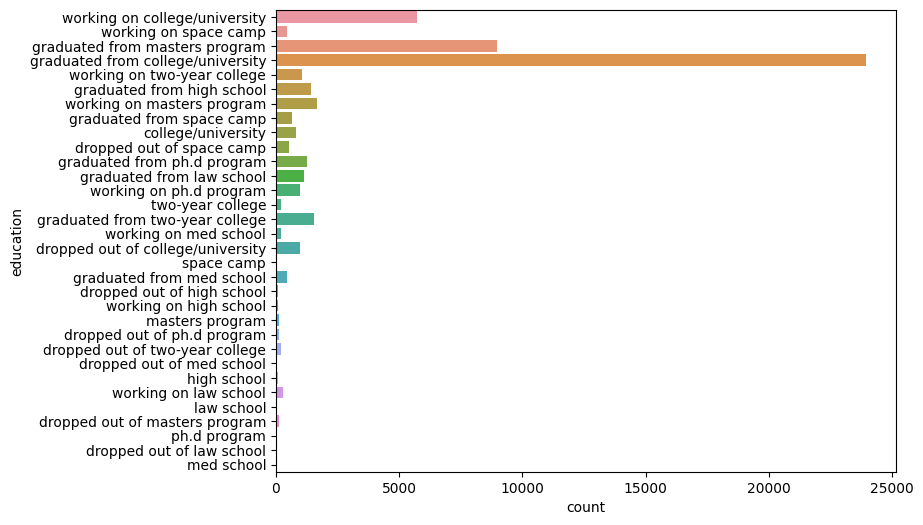

In [21]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="education");

#### Job

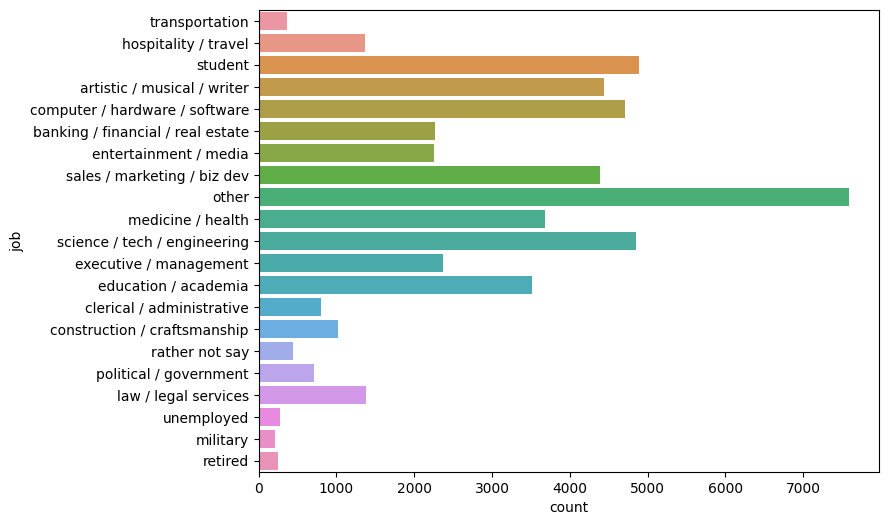

In [22]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="job");


As we can see on the graph, most of users declared their job as 'other'.By calling 'value_counts' function on job column we can see exact number of each job that were declared by users.Students, technicians, computer specialists, artists and those who works in business make up the majority of OKCupid users with roughly the equal percentage of users.

In [13]:
df.job.value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

#### Offspring
The chart below shows that most of the users do not have kids.

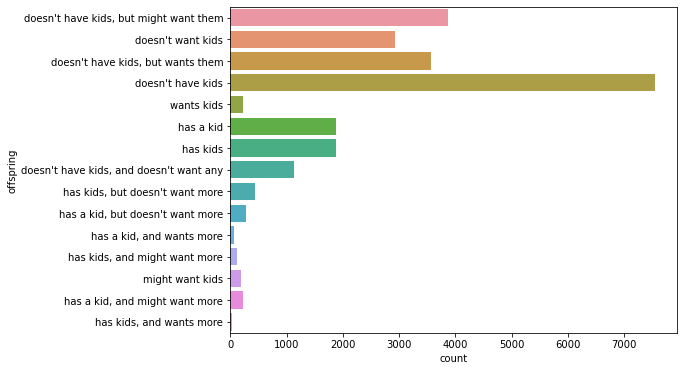

In [14]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="offspring");


#### Orientation

According to the chart below, as far as sexual orientation is concerned, the majority of the users are straight.

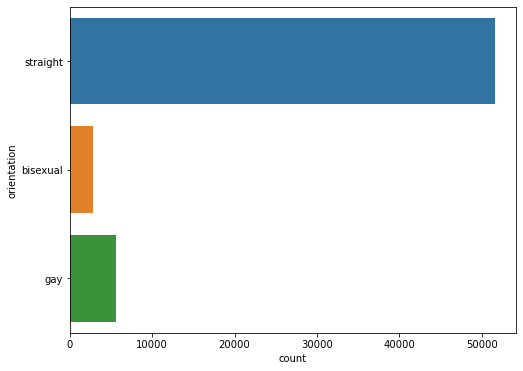

In [15]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="orientation");


#### pets

As we can see in the graph, most users like both dogs and cats.

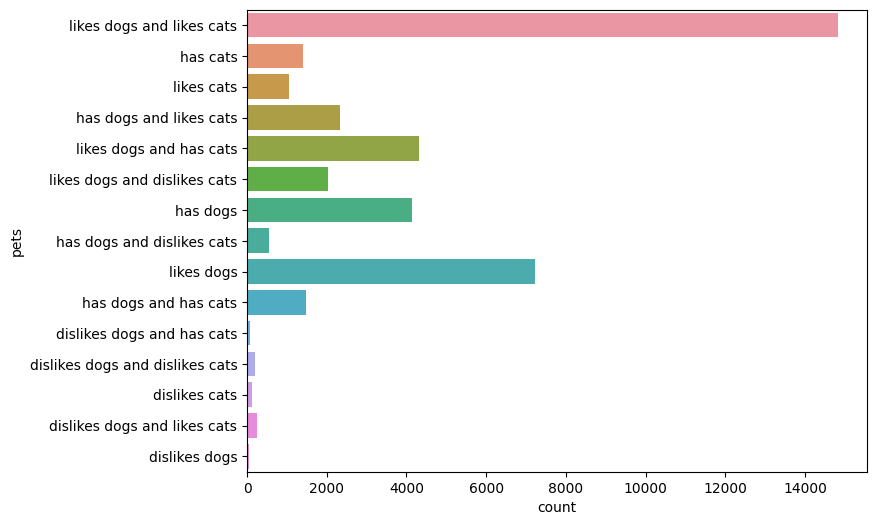

In [26]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="pets");


#### Religion

By looking at the countplot of users' religion and calling value_counts function on this column, we find out that we can reduce the number of categories.

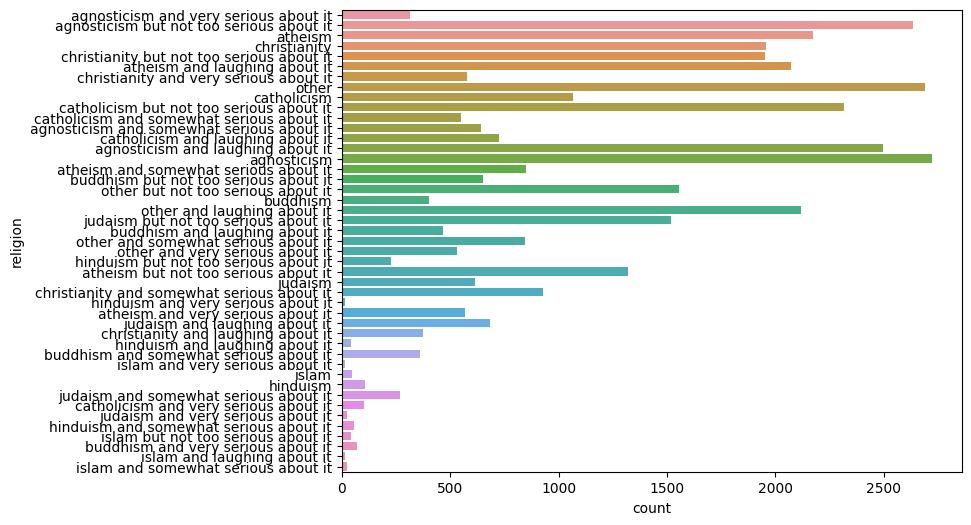

In [27]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="religion");


In [16]:
df.religion.value_counts(dropna=False)

NaN                                           20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
judaism and 

In [17]:
df['religion_cleaned'] = df['religion'].str.split().str[0]

print(df['religion_cleaned'].head())

0    agnosticism
1    agnosticism
2            NaN
3            NaN
4            NaN
Name: religion_cleaned, dtype: object


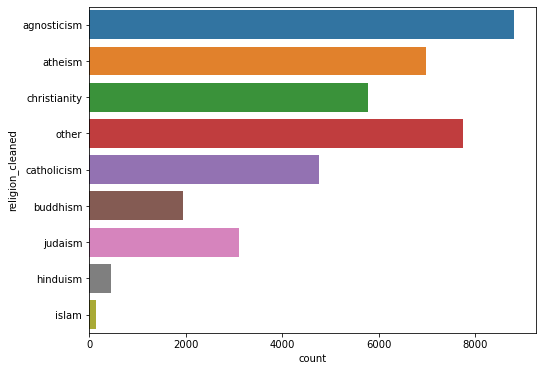

In [18]:
#changing the size of the plot
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="religion_cleaned");


The plot shows that most of the users are not religious.The majority of OKCupid's users are agnostic or atheist or did not mention their belief(other).Between religious users, most of them are christian.

#### sign

Like the religion column we need to clean the sign column.We have twelve astrological signs, so we have to clean sign column and reduce the number of categories into twelve.

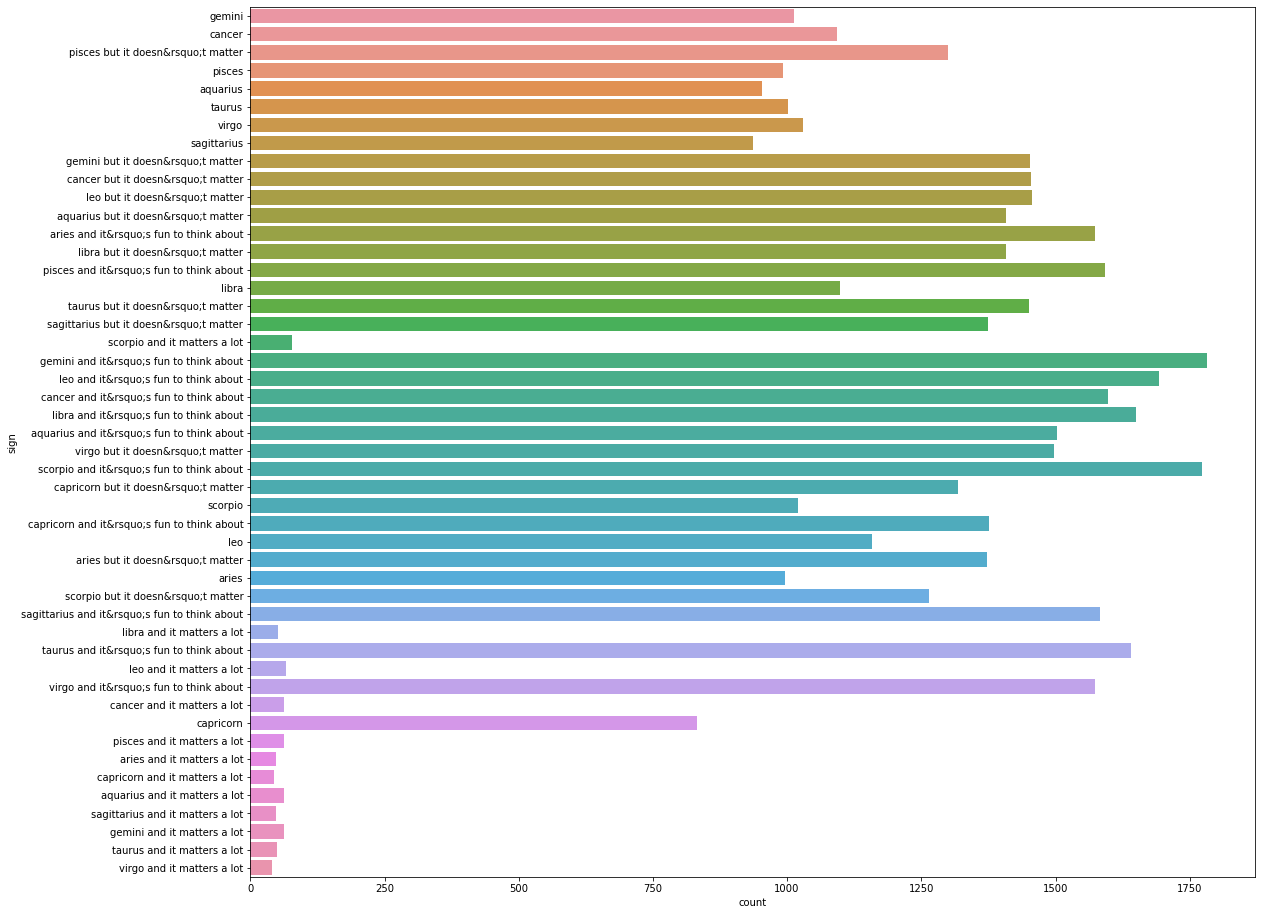

In [20]:
#changing the size of the plot
plt.figure(figsize=(18,16))

sns.countplot(data=df, y="sign");


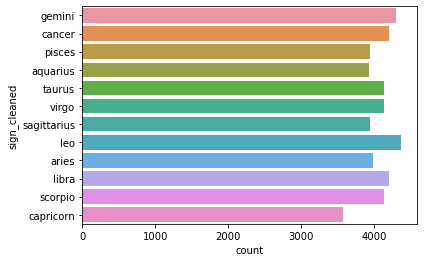

In [21]:
df['sign_cleaned'] = df['sign'].str.split().str[0]

sns.countplot(data=df, y="sign_cleaned");


Astrological sign of the most of users is Leo and least common astrological sign of the users is Capricorn.

#### Smokes

As we can see in the graph below, the vast majority of users do not smoke.

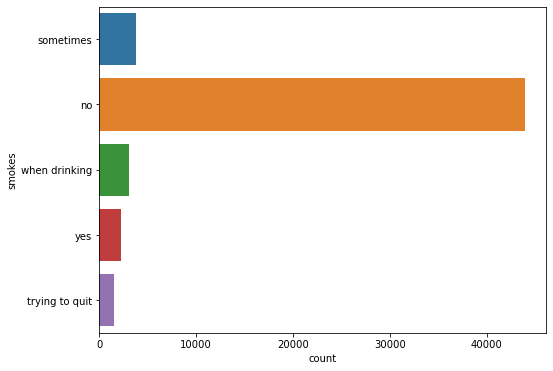

In [22]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="smokes");


#### Status

The vast majority of uses are single.This is reasonable.Because they registered in this dating app to find a partner.

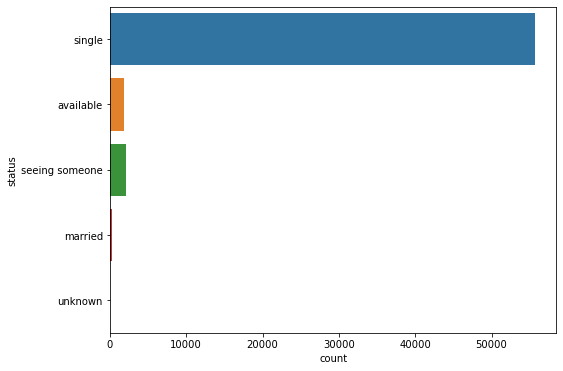

In [23]:
plt.figure(figsize=(8,6))

sns.countplot(data=df, y="status");


### Data Preperation

#### Missing Value

Here we take a look at missing values in each column. We can see that lots of columns have many null values.

In [25]:
print(df.isnull().sum())

age                     0
status                  0
sex                     0
orientation             0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
pets                19921
religion            20226
sign                11056
smokes               5512
speaks                 50
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
religion_cleaned    20226
sign_cleaned        11056
dtype: int64


#### Convert Categorical Variables into Numeric Form

Most of machine learning algorithms require all data to be numerical.Before deploying any machine learning algorithm to our data, we have to convert categorical features into numeric values.Some features like "drinks", "drug" and "smoke" have a degree range and can be considered as ordinal variable. These features can be mapped to numeric values.

I create dummy variables for 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'status' and 'education' whenever I use them for my analysis.Because they do not have a clear order.

In [26]:
drinks_codes = {
    "not at all": 0,
    "rarely": 1,
    "socially": 2,
    "often": 3,
    "very often": 4,
    "desperately": 5
}

drugs_codes = {
    "never": 0,
    "sometimes": 1,
    "often": 2
}

smokes_codes = {
    "no": 0,
    "when drinking": 1,
    "sometimes": 2,
    "yes": 3,
    "trying to quit": 3
}

"""
body_type_codes = {'thin':0,
                   'skinny':1,
                   'fit':2,
                   'athletic':3,
                   'jacked':4,
                   'rather not say':5,
                   'average':6,
                   'a little extra':7,
                   'used up':8,
                   'curvy':9,
                   'overweight':10,
                   'full figured':11}

df_copy["body_type_code"] = df_copy['body_type'].map(body_type_codes)

"""

def catVartoNumeric(dataframe):
    #convert drinks column to numeric value
    dataframe["drinks_code"] = dataframe['drinks'].map(drinks_codes)

    #convert drugs column to numeric value

    dataframe["drugs_code"] = dataframe['drugs'].map(drugs_codes)

    #convert smokes ordinal categorical values into numeric value

    dataframe["smokes_code"] = dataframe['smokes'].map(smokes_codes)

    return


### Question 1: Can we predict Zodiac signs using 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' and 'drugs_code' features?

We don't need all columns for our machine learning part.So we have to choose subset of features and then remove the rows which have a null values in those columns.

In [27]:
#create copy of dataframe to do the changes only to a copy of data
df_copy = df

#convert 'smokes', 'drinks' and 'drugs' to numeric form

catVartoNumeric(df_copy)

selected_features = ['sign_cleaned', 'body_type', 'diet', 'orientation', 'pets', 
                     'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' , 'drugs_code']
df_copy = df_copy[selected_features].dropna()

#convert 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job' into dummy variables

categoricalCols = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job']

for col in categoricalCols:
    df_copy = pd.get_dummies(df_copy, columns=[col], prefix = [col])

print(df_copy.shape)

(12927, 84)


In [28]:
#let's take a look at new dataframe
df_copy.head(10)

#print(df_copy.columns)

,sign_cleaned,smokes_code,drinks_code,drugs_code,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,2.0,2.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0.0,3.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0.0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,leo,0.0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,taurus,0.0,2.0,0.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18,libra,0.0,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,pisces,0.0,2.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
20,libra,0.0,2.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
22,sagittarius,0.0,2.0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting Data

Before applying the machine learning methods, we have to split our data into training set and test set. I have to use normalization in order to give equal weights/importance to each feature so that no single feature steers model performance in one direction just because it has larger value.By using MinMaxScaler I change the values of numeric feature of the dataset to a common scale.

In [29]:

#Y is the target column, X has the features
X = df_copy.iloc[:, 1:]
y = df_copy['sign_cleaned']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#use MinMaxScaler to put all features values in the same range and scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model Building

In this step, we have choose some classification methods from scikit-learn library to predict class of test set samples.Classification methods should be able to do a multiclass classification. I used Multinomial Naive Bayes, LogisticRegression, DecisionTreeClassifiers and KNeighborsClassifier.

#### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the Random Forest model
RFmodel = RandomForestClassifier()

# Fit the Random Forest model to the training data
RFmodel.fit(X_train_scaled, y_train)

# Calculate training accuracy
training_accuracy = RFmodel.score(X_train_scaled, y_train)

print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))
print()

# Make predictions on the test data
predictions = RFmodel.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 91.0%

              precision    recall  f1-score   support

    aquarius       0.05      0.06      0.05       178
       aries       0.07      0.07      0.07       212
      cancer       0.09      0.09      0.09       246
   capricorn       0.06      0.07      0.06       168
      gemini       0.07      0.08      0.08       231
         leo       0.11      0.11      0.11       254
       libra       0.10      0.12      0.11       199
      pisces       0.07      0.08      0.07       181
 sagittarius       0.08      0.08      0.08       224
     scorpio       0.06      0.05      0.06       228
      taurus       0.09      0.07      0.08       234
       virgo       0.08      0.09      0.09       231

    accuracy                           0.08      2586
   macro avg       0.08      0.08      0.08      2586
weighted avg       0.08      0.08      0.08      2586



#### Logistic Regression

In [32]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 13.0%

              precision    recall  f1-score   support

    aquarius       0.05      0.03      0.04       178
       aries       0.08      0.08      0.08       212
      cancer       0.11      0.13      0.12       246
   capricorn       0.05      0.04      0.04       168
      gemini       0.12      0.14      0.13       231
         leo       0.09      0.10      0.09       254
       libra       0.09      0.12      0.10       199
      pisces       0.06      0.09      0.07       181
 sagittarius       0.06      0.04      0.05       224
     scorpio       0.08      0.04      0.05       228
      taurus       0.07      0.05      0.06       234
       virgo       0.09      0.14      0.11       231

    accuracy                           0.09      2586
   macro avg       0.08      0.08      0.08      2586
weighted avg       0.08      0.09      0.08      2586



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that by using naive bayes classifier and logistic regression, we get poor results.The accuracy of both models are very low(9%).They are even perform very poorly on the training data too.The accuracy of model on training data is 13%. This shows us that these two classification methods are not suitable and we have underfitting problem.

#### ANN

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, y_test, X_train_scaled, and X_test_scaled already defined

# Instantiate the MLPClassifier
ANNmodel = MLPClassifier(max_iter=1000)  # You may need to adjust max_iter based on convergence

# Fit the ANN model to the training data
ANNmodel.fit(X_train_scaled, y_train)

# Calculate training accuracy
training_accuracy = ANNmodel.score(X_train_scaled, y_train)

print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))
print()

# Make predictions on the test data
predictions = ANNmodel.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 39.0%

              precision    recall  f1-score   support

    aquarius       0.06      0.07      0.06       178
       aries       0.08      0.07      0.08       212
      cancer       0.07      0.09      0.08       246
   capricorn       0.10      0.11      0.10       168
      gemini       0.09      0.10      0.10       231
         leo       0.08      0.06      0.07       254
       libra       0.06      0.06      0.06       199
      pisces       0.06      0.06      0.06       181
 sagittarius       0.06      0.06      0.06       224
     scorpio       0.08      0.08      0.08       228
      taurus       0.09      0.06      0.07       234
       virgo       0.09      0.09      0.09       231

    accuracy                           0.08      2586
   macro avg       0.08      0.08      0.08      2586
weighted avg       0.08      0.08      0.08      2586



#### Decision Tree Classifier

In [36]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 91.0%

              precision    recall  f1-score   support

    aquarius       0.06      0.06      0.06       178
       aries       0.06      0.07      0.07       212
      cancer       0.10      0.09      0.10       246
   capricorn       0.08      0.10      0.08       168
      gemini       0.09      0.10      0.09       231
         leo       0.11      0.09      0.10       254
       libra       0.08      0.09      0.08       199
      pisces       0.07      0.09      0.08       181
 sagittarius       0.06      0.05      0.06       224
     scorpio       0.07      0.06      0.06       228
      taurus       0.08      0.07      0.08       234
       virgo       0.09      0.09      0.09       231

    accuracy                           0.08      2586
   macro avg       0.08      0.08      0.08      2586
weighted avg       0.08      0.08      0.08      2586



The accuracy of decision tree model on training data is 91% which is very high but on test data it performs very bad by 8% accuracy.This shows that decision tree model suffers from overfitting.If we guess the zodiac sign of user, the probability of guessing correct is 1/12 (0.083).This tell us that our models that I trained above did not significantly outperform random guessing.

So we can conclude that by using 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' and 'drugs_code', we cannot predict zodiac sign of the user.

### Question 2: Can we use lifestyle information ('diet', 'smokes_code', 'drinks_code', 'drugs_code'), sex and age to predict body type?

In [38]:
#create copy of dataframe to do the changes only to a copy of data
df_copy2 = df

#convert 'smokes', 'drinks' and 'drugs' to numeric form

catVartoNumeric(df_copy2)

selected_features = ['body_type', 'diet', 'sex', 'smokes_code', 'drinks_code' , 'drugs_code', 'age']
df_copy2 = df_copy2[selected_features].dropna()

#convert 'diet' and 'sex' into dummy variables
categoricalCols = ['diet', 'sex']

for col in categoricalCols:
    df_copy2 = pd.get_dummies(df_copy2, columns=[col], prefix = [col])

print(df_copy2.shape)

(25202, 25)


In [39]:
#Y is the target column, X has the features
X = df_copy2.iloc[:, 1:]
y = df_copy2['body_type']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

After splitting data into training set and test set and normalizing it, our data is ready for analysis.For this question I used 4 different classifiers.Logistic Regression, K Nearest Neighbor, Decision Tree and Support Vector Machine.

#### Logistic Regression

Logistic Regression do a binary classification.In order to do a multi class classification, I give "multinomial" argument to the  multi_class parameter.The accuracy of this model on training data is 28.99% and accuracy of model on test data is 29%.

In [40]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 28.999999999999996%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00       265
      athletic       0.30      0.54      0.38      1028
       average       0.29      0.50      0.37      1399
         curvy       0.22      0.11      0.15       357
           fit       0.28      0.14      0.19      1159
  full figured       0.00      0.00      0.00        95
        jacked       0.00      0.00      0.00        34
    overweight       0.00      0.00      0.00        46
rather not say       0.00      0.00      0.00        12
        skinny       1.00      0.01      0.01       166
          thin       0.07      0.00      0.00       438
       used up       0.00      0.00      0.00        42

      accuracy                           0.29      5041
     macro avg       0.18      0.11      0.09      5041
  weighted avg       0.26      0.29      0.23      5041



/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Random Forest

#### Finding best number of estimators. You can change the n_estimator values to explore more

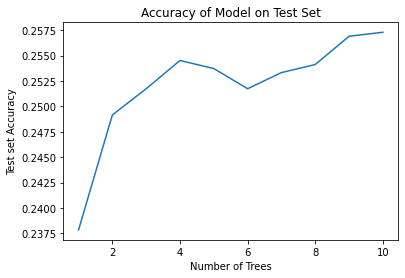

Best number of trees for the best accuracy is: 10


In [41]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


# Initialize an empty list to store accuracies
accuracies = []

# Range of values for the number of trees in the forest
n_estimators_list = list(range(1, 11))

# Loop through different values for the number of trees
for n_estimators in n_estimators_list:
    RFmodel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    RFmodel.fit(X_train_scaled, y_train)
    accuracies.append(RFmodel.score(X_test_scaled, y_test))

# Plot the accuracy vs. the number of trees
plt.plot(n_estimators_list, accuracies)
plt.xlabel("Number of Trees")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

# Convert the accuracies to a numpy array for easier analysis
accuracies_np = np.asarray(accuracies)

# Find the best number of trees for the highest accuracy
best_n_estimators = n_estimators_list[np.argmax(accuracies_np)]
print(f"Best number of trees for the best accuracy is: {best_n_estimators}")



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Initialize the Random Forest model with the best number of estimators
RFmodel = RandomForestClassifier(n_estimators=9, random_state=42)

# Fit the model on the training data
RFmodel.fit(X_train_scaled, y_train)

# Calculate and print the training accuracy
training_accuracy = RFmodel.score(X_train_scaled, y_train)
print("The accuracy of the model on training data is: {:.2%}".format(training_accuracy))
print()

# Make predictions on the test data
predictions = RFmodel.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 48.23%

                precision    recall  f1-score   support

a little extra       0.08      0.04      0.05       265
      athletic       0.29      0.40      0.34      1028
       average       0.30      0.35      0.32      1399
         curvy       0.18      0.13      0.15       357
           fit       0.26      0.26      0.26      1159
  full figured       0.00      0.00      0.00        95
        jacked       0.06      0.03      0.04        34
    overweight       0.12      0.04      0.06        46
rather not say       0.00      0.00      0.00        12
        skinny       0.08      0.04      0.05       166
          thin       0.10      0.05      0.07       438
       used up       0.06      0.02      0.03        42

      accuracy                           0.26      5041
     macro avg       0.13      0.11      0.11      5041
  weighted avg       0.23      0.26      0.24      5041



#### Decision Tree Classifier

When using a Decision Tree classifier in python we can tune its hyperparameters to get the best result.We can find the best parameters that give best score.By using grid search technique, we can achieve this.I used 'criterion', 'max_depth', 'min_samples_leaf' for tuning.The accuracy of Decision Tree on training data is 32% and accuracy of model on test data is 29%.

In [43]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2}
Best score is 0.2857002152873712


In [100]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  8, min_samples_leaf = 2)

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

print(DTmodel.get_depth())

The accuracy of model on training data is: 35.0%

                precision    recall  f1-score   support

a little extra       0.12      0.02      0.03        98
      athletic       0.32      0.61      0.42       275
       average       0.25      0.37      0.30       316
         curvy       0.22      0.27      0.24        83
           fit       0.28      0.08      0.12       241
  full figured       0.33      0.07      0.12        27
        jacked       0.00      0.00      0.00        19
    overweight       0.00      0.00      0.00        28
rather not say       0.00      0.00      0.00         2
        skinny       0.50      0.03      0.05        38
          thin       0.24      0.05      0.08        85
       used up       0.00      0.00      0.00         9

      accuracy                           0.28      1221
     macro avg       0.19      0.12      0.11      1221
  weighted avg       0.25      0.28      0.22      1221

8


#### Support Vector Machine

We can tune hyperparameters for SVM model too. I choose 'C', 'gamma', 'kernel' for tuning.The accuracy of tuned Support Vector Machine on training data is 30% and accuracy of model on test data is 29%.

In [44]:
param_grid = {'C': [0.1],
              'gamma': [0.1],
              'kernel': ['linear']}

SVCmodel = SVC()

svm_cv = GridSearchCV(SVCmodel, param_grid, cv = 3)

svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine classifier Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Tuned Support Vector Machine classifier Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Best score is 0.2870889748549323


In [102]:
SVCmodel = SVC(kernel = 'rbf', C = 0.1, gamma = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 30.0%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00        98
      athletic       0.33      0.60      0.42       275
       average       0.25      0.54      0.35       316
         curvy       0.00      0.00      0.00        83
           fit       0.36      0.07      0.12       241
  full figured       0.00      0.00      0.00        27
        jacked       0.00      0.00      0.00        19
    overweight       0.00      0.00      0.00        28
rather not say       0.00      0.00      0.00         2
        skinny       0.00      0.00      0.00        38
          thin       0.00      0.00      0.00        85
       used up       0.00      0.00      0.00         9

      accuracy                           0.29      1221
     macro avg       0.08      0.10      0.07      1221
  weighted avg       0.21      0.29      0.21      1221



We can see that all of four models have approximately the same accuracy.Their accuracy on both training set and test set is about 30%. This accuracy is under 50% and tells us that 'diet', 'smokes_code', 'drinks_code', 'drugs_code', sex and age cannot be used to predict body type.

### Question 3: Can we predict income of users using "job", "sex" and "education"?

First of all we have to inspect income column and see what values were entered by users. We can see that majority of users did not give informtion about their income(-1). We should replace (-1) with nan values and then drop those rows with other rows that have a null values in them.

In this part of project, I do not use normalization or standardization, because after converting 'job', 'sex' and 'education' into dummy variables and using one hot encoding method, all the features' data mapped to ones and zeros and all the features have the same scale. So we do not need to scale them.

In [45]:
#create copy of dataframe to do the changes only to a copy of data
df_copy3 = df

df_copy3[df_copy3.income==-1]= np.nan

df_copy3.income.value_counts(dropna = False)

NaN          48442
20000.0       2952
100000.0      1621
80000.0       1111
30000.0       1048
40000.0       1005
50000.0        975
60000.0        736
70000.0        707
150000.0       631
1000000.0      521
250000.0       149
500000.0        48
Name: income, dtype: int64

In [104]:
selected_features = ['income', 'job', 'sex', 'education']
df_copy3 = df_copy3[selected_features].dropna()

#convert 'job', 'sex' and 'education' into dummy variables
categoricalCols = ['job', 'sex', 'education']

for col in categoricalCols:
    df_copy3 = pd.get_dummies(df_copy3, columns=[col], prefix = [col], drop_first =True)

print(df_copy3.shape)

df_copy3.head()

(10536, 52)


,income,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,job_entertainment / media,job_executive / management,job_hospitality / travel,job_law / legal services,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
1,80000.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,20000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,40000.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,30000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,50000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
#Y is the target column, X has the features
X = df_copy3.iloc[:, 1:]
y = df_copy3['income']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

#### Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test already defined

# Define the range of estimators
n_estimators_list = list(range(1, 11))

# Initialize lists to store accuracies
accuracies = []

# Iterate through different number of estimators
for n_estimators in n_estimators_list:
    # Initialize the Random Forest model
    RFmodel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model on the training data
    RFmodel.fit(X_train, y_train)

    # Append the accuracy on the test set to the list
    accuracies.append(RFmodel.score(X_test, y_test))

# Plot the accuracy vs the number of estimators
plt.plot(n_estimators_list, accuracies)
plt.xlabel("Number of Estimators")
plt.ylabel("Test Set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

# Convert accuracies to a numpy array for further analysis
l_np = np.asarray(accuracies)

# Find the best number of estimators for the best accuracy
best_n_estimators = n_estimators_list[np.argmax(l_np)]
print(f"Best number of estimators for the best accuracy is: {best_n_estimators}")



ValueError: could not convert string to float: 'single'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have X_train, X_test, y_train, y_test already defined

# Set the best number of estimators
best_n_estimators = 9

# Initialize the Random Forest model with the best number of estimators
RFmodel = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Fit the model on the training data
RFmodel.fit(X_train, y_train)

# Make predictions on the test set
RF_predictions = RFmodel.predict(X_test)


In [110]:


print(classification_report(y_test, RF_predictions))




              precision    recall  f1-score   support

     20000.0       0.49      0.82      0.61       537
     30000.0       0.12      0.03      0.05       177
     40000.0       0.14      0.06      0.09       186
     50000.0       0.19      0.13      0.16       171
     60000.0       0.02      0.01      0.01       122
     70000.0       0.18      0.06      0.09       147
     80000.0       0.18      0.08      0.11       208
    100000.0       0.30      0.65      0.41       302
    150000.0       0.22      0.15      0.18       131
    250000.0       0.14      0.04      0.07        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.19      0.09      0.12        93

    accuracy                           0.35      2108
   macro avg       0.18      0.18      0.16      2108
weighted avg       0.26      0.35      0.27      2108



#### Decision Tree Classifier

In [ ]:
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

In [112]:
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  18, min_samples_leaf = 3)

DTmodel.fit(X_train, y_train)

training_accuracy = DTmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 39.0%

              precision    recall  f1-score   support

     20000.0       0.43      0.89      0.58       537
     30000.0       0.09      0.02      0.03       177
     40000.0       0.17      0.05      0.08       186
     50000.0       0.17      0.10      0.12       171
     60000.0       0.00      0.00      0.00       122
     70000.0       0.22      0.01      0.03       147
     80000.0       0.20      0.03      0.06       208
    100000.0       0.30      0.63      0.41       302
    150000.0       0.23      0.12      0.16       131
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.13      0.02      0.04        93

    accuracy                           0.34      2108
   macro avg       0.16      0.16      0.12      2108
weighted avg       0.24      0.34      0.24      2108



####SVC

In [ ]:
SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train, y_train)

training_accuracy = SVCmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test)

print(classification_report(y_test, predictions))

#### Logistic Regression

In [114]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train, y_train)

training_accuracy = logReg_model.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 37.0%

              precision    recall  f1-score   support

     20000.0       0.47      0.88      0.61       537
     30000.0       0.14      0.03      0.05       177
     40000.0       0.10      0.01      0.02       186
     50000.0       0.19      0.10      0.13       171
     60000.0       0.00      0.00      0.00       122
     70000.0       0.09      0.01      0.01       147
     80000.0       0.17      0.07      0.10       208
    100000.0       0.29      0.73      0.41       302
    150000.0       0.21      0.10      0.14       131
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        11
   1000000.0       0.24      0.04      0.07        93

    accuracy                           0.36      2108
   macro avg       0.16      0.16      0.13      2108
weighted avg       0.24      0.36      0.25      2108



We can see that Logistic Regression and svc models have the best accuracy by 36% on test set, KNN has 35% accuracy and decision tree classifier has the least accuracy with 34%.All the four models have almost the same accuracy that is under 50% which tells us that we can not predict the income of user by his job, sex and education.

### Question 4: Can we predict the sex of the users based on age and body type?

In [115]:
#create copy of dataframe to do the changes only to a copy of data
df_copy4 = df

selected_features = ['sex', 'body_type', 'height']
df_copy4 = df_copy4[selected_features].dropna()

#height and 'body_type'

#convert 'body_type' into dummy variable
df_copy4 = pd.get_dummies(df_copy4, columns=['body_type'], prefix = ['body_type'])

print(df_copy4.shape)

df_copy4.head()

(10938, 14)


,sex,height,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,body_type_thin,body_type_used up
1,m,70.0,0,0,1,0,0,0,0,0,0,0,0,0
3,m,71.0,0,0,0,0,0,0,0,0,0,0,1,0
11,m,72.0,0,0,1,0,0,0,0,0,0,0,0,0
13,f,66.0,0,0,0,0,0,0,0,0,0,1,0,0
14,f,62.0,0,0,0,0,0,0,0,0,0,0,1,0


In [116]:
#Y is the target column, X has the features
X = df_copy4.iloc[:, 1:]
y = df_copy4['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = StandardScaler()

# standardization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

scaler2 = MinMaxScaler()

# normalization
X_train_normalized = scaler2.fit_transform(X_train)
X_test_normalized = scaler2.fit_transform(X_test)


#### ANN

In [117]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



# Initialize the MLPClassifier model
ANNmodel = MLPClassifier(random_state=42)

# Fit the model on the training data
ANNmodel.fit(X_train_normalized, y_train)

# Make predictions on the test set
ANN_predictions = ANNmodel.predict(X_test_normalized)

# Print the classification report
print(classification_report(y_test, ANN_predictions))
print()

# Calculate and print the accuracy on the training data
training_accuracy = ANNmodel.score(X_train_normalized, y_train)
print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))


              precision    recall  f1-score   support

           f       0.28      1.00      0.44       616
           m       0.80      0.01      0.01      1572

    accuracy                           0.28      2188
   macro avg       0.54      0.50      0.22      2188
weighted avg       0.65      0.28      0.13      2188


The accuracy of the model on training data is: 88.0%


#### Random Forest

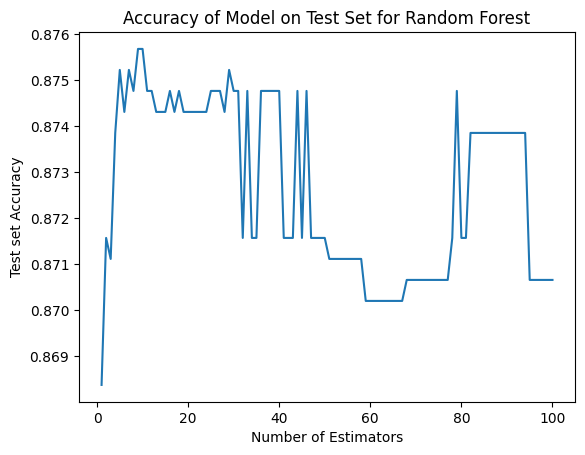

Best number of estimators for the best accuracy is: 9


In [118]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test already defined

accuracies = []
estimator_list = list(range(1, 101))

for n_estimators in estimator_list:
    RandomForestModel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    RandomForestModel.fit(X_train_scaled, y_train)
    accuracies.append(RandomForestModel.score(X_test_scaled, y_test))

# Plotting the accuracy vs. number of estimators
plt.plot(estimator_list, accuracies)
plt.xlabel("Number of Estimators")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set for Random Forest")
plt.show()

# Finding the best number of estimators
np_accuracies = np.asarray(accuracies)
best_n_estimators = np_accuracies.argmax() + 1
print(f"Best number of estimators for the best accuracy is: {best_n_estimators}")


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test already defined

# Create a Random Forest model with 9 estimators
RandomForestModel = RandomForestClassifier(n_estimators=9, random_state=42)
RandomForestModel.fit(X_train_scaled, y_train)

# Make predictions on the test set
RandomForest_predictions = RandomForestModel.predict(X_test_scaled)

# Calculate training accuracy
training_accuracy = RandomForestModel.score(X_train_scaled, y_train)
print("The accuracy of the model on the training data is: {:.2f}%".format(training_accuracy * 100))
print()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, RandomForest_predictions))




print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

The accuracy of the model on the training data is: 88.67%

Classification Report:
              precision    recall  f1-score   support

           f       0.80      0.74      0.77       616
           m       0.90      0.93      0.91      1572

    accuracy                           0.88      2188
   macro avg       0.85      0.84      0.84      2188
weighted avg       0.87      0.88      0.87      2188

The accuracy of model on training data is: 89.0%


#### Decision Tree Classifier

In [120]:
param_grid = {"max_depth": [8],
              "min_samples_leaf": list(range(1, 3)),
              "criterion": ["entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}
Best score is 0.8804571428571428


In [121]:


DTmodel = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 4)

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))


print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

#print(DTmodel.get_depth())

              precision    recall  f1-score   support

           f       0.79      0.76      0.77       616
           m       0.91      0.92      0.91      1572

    accuracy                           0.87      2188
   macro avg       0.85      0.84      0.84      2188
weighted avg       0.87      0.87      0.87      2188

The accuracy of model on training data is: 89.0%


#### SVM

In [122]:


SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))



print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.84      0.71      0.77       616
           m       0.89      0.95      0.92      1572

    accuracy                           0.88      2188
   macro avg       0.87      0.83      0.84      2188
weighted avg       0.88      0.88      0.88      2188

The accuracy of model on training data is: 88.0%


#### Logistic Regression

In [123]:


logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))



print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.85      0.70      0.77       616
           m       0.89      0.95      0.92      1572

    accuracy                           0.88      2188
   macro avg       0.87      0.83      0.84      2188
weighted avg       0.88      0.88      0.88      2188

The accuracy of model on training data is: 88.0%


For this part we use 5 models: Multinomial Naive Bayes, K Nearest Neighbor, Decision Tree Classifier, Support Vector Machine and Logistic Regression.For all models I got a very good results. The accuracy of Four Models(SVM, Logistic Regression, Decision Tree and KNN) is almost 86%. Multinomial Naive Bayes accuracy(70%) is the lowest between these 5 models.

All the five algorithms have a very good accuracy and we can use age and body type to predict the sex of the user.

### Question 5: Can we predict sex of the user with education level and income?

In [49]:
#create copy of dataframe to do the changes only to a copy of data
df_copy5 = df

#replace -1 values with nan
df_copy5[df_copy5.income==-1]= np.nan

selected_features = ['sex', 'education', 'income']
df_copy5 = df_copy5[selected_features].dropna()

#convert 'education' into dummy variable
df_copy5 = pd.get_dummies(df_copy5, columns=['education'], prefix = ['education'])

print(df_copy5.shape)

df_copy5.head()

(10783, 33)


,sex,income,education_college/university,education_dropped out of college/university,education_dropped out of high school,education_dropped out of law school,education_dropped out of masters program,education_dropped out of med school,education_dropped out of ph.d program,education_dropped out of space camp,...,education_space camp,education_two-year college,education_working on college/university,education_working on high school,education_working on law school,education_working on masters program,education_working on med school,education_working on ph.d program,education_working on space camp,education_working on two-year college
1,m,80000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,m,20000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,m,40000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,f,30000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,f,50000.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
#Y is the target column, X has the features
X = df_copy5.iloc[:, 1:]
y = df_copy5['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#scaler = StandardScaler()

scaler = MinMaxScaler()

# normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### ANN

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test already defined

# Create an MLP (Artificial Neural Network) model
ANNmodel = MLPClassifier(random_state=42)
ANNmodel.fit(X_train_scaled, y_train)

# Make predictions on the test set
ANN_predictions = ANNmodel.predict(X_test_scaled)

# Calculate training accuracy
training_accuracy = ANNmodel.score(X_train_scaled, y_train)
print("The accuracy of the model on the training data is: {:.2f}%".format(training_accuracy * 100))
print()

# Display classification report
print("Classification Report:")
print(classification_report(y_test, ANN_predictions))


The accuracy of the model on the training data is: 72.83%

Classification Report:
              precision    recall  f1-score   support

           f       0.43      0.04      0.08       613
           m       0.72      0.98      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.57      0.51      0.45      2157
weighted avg       0.64      0.71      0.62      2157



#### Random Forest

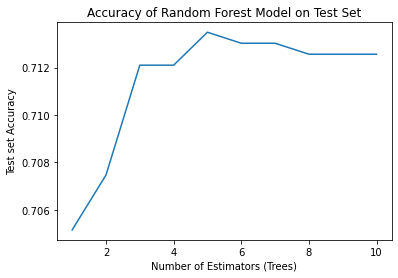

Best number of estimators for the best accuracy is: 5


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



# Initialize an empty list to store accuracies
accuracies = []

# Define a list of values for the number of estimators (trees)
n_estimators_list = list(range(1, 11))

# Loop through different number of estimators
for n_estimators in n_estimators_list:
    # Create a Random Forest model
    RFmodel = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Fit the model to the training data
    RFmodel.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = RFmodel.predict(X_test_scaled)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

# Plot the results
plt.plot(n_estimators_list, accuracies)
plt.xlabel("Number of Estimators (Trees)")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Random Forest Model on Test Set")
plt.show()

# Convert the list to a NumPy array for easier analysis
l_np = np.asarray(accuracies)

# Find the best number of estimators for the best accuracy
best_n_estimators = n_estimators_list[l_np.argmax()]
print(f"Best number of estimators for the best accuracy is: {best_n_estimators}")


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Set the best number of estimators
best_n_estimators = 5

# Create a Random Forest model with the best number of estimators
RFmodel = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)

# Fit the model to the training data
RFmodel.fit(X_train_scaled, y_train)

# Calculate training accuracy
training_accuracy = RFmodel.score(X_train_scaled, y_train)
print("The accuracy of the model on training data is: {}%".format(round(training_accuracy, 2) * 100))
print()

# Make predictions on the test set
predictions = RFmodel.predict(X_test_scaled)

# Print classification report for the test set
print(classification_report(y_test, predictions))


The accuracy of the model on training data is: 74.0%

              precision    recall  f1-score   support

           f       0.47      0.06      0.10       613
           m       0.72      0.97      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.59      0.52      0.47      2157
weighted avg       0.65      0.71      0.62      2157



In [ ]:
### macro average first reduces your confusion matrix into scores & then takes the avg
## micro average will take or reduce each confusion matrix & then calculates the score

#### Logistic Regression

In [59]:
logReg_model = LogisticRegression(multi_class= "multinomial")

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

           f       0.33      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.72      2157
   macro avg       0.52      0.50      0.42      2157
weighted avg       0.61      0.72      0.60      2157



#### Decision Tree Classifier

In [60]:
DTmodel = DecisionTreeClassifier()

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

#print(DTmodel.get_depth())

The accuracy of model on training data is: 74.0%

              precision    recall  f1-score   support

           f       0.42      0.06      0.11       613
           m       0.72      0.97      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.57      0.51      0.47      2157
weighted avg       0.64      0.71      0.62      2157



#### Support Vector Machine

In [61]:
SVCmodel = SVC(kernel = 'linear', C = 1)

SVCmodel.fit(X_train_scaled, y_train)

training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 73.0%

              precision    recall  f1-score   support

           f       0.25      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.48      0.50      0.42      2157
weighted avg       0.58      0.71      0.60      2157



This time the accuracy of all five models is approximately 72% which is very promising. We conclude that we can predict sex of the user with education level and income.

## Conclusion

- Most of the users are between 25 to 35 years old.
- There are more male users than female users.
- Males are taller than females.
- We cannot predict Zodiac signs using 'body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' and 'drugs_code' features.
- We cannot predict body type by using lifestyle information ('diet', 'smokes_code', 'drinks_code', 'drugs_code'), sex and age.
- We can not predict the income of the user by making models based on his job, sex and education.
- An accurate model can be built to predict the gender of an user based on their age and body type. I got 86% accuracy with SVM, Logistic Regression, Decision Tree and KNN models.
- We can build good models with high accuracy(72%) to predict sex of an user with education level and income.